<a href="https://colab.research.google.com/github/alimoorreza/CS167-sp24-notes/blob/main/Day23_Recurrent_Neural_Network_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day23
## Deep Learning and Recurrent Neural Network (RNN)

#### CS167: Machine Learning, Spring 2024

Thursday, April 25th, 2024

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_sp24/cs167_syllabus_sp24.pdf)


# Resources:

- [Understanding LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [Unreasonable Effectiveness of RNNs](http://karpathy.github.io/2015/05/21/rnn-effectiveness)
- [Intro to RNNs](https://towardsdatascience.com/a-brief-introduction-to-recurrent-neural-networks-638f64a61ff4)


## __Put the Model on Training Device (GPU or CPU)__
We want to accelerate the training process using graphical processing unit (GPU). Fortunately, in Colab we can access for GPU. You need to enable it from _Runtime-->Change runtime type-->GPU or TPU_

In [1]:
# check to see if torch.cuda is available, otherwise it will use CPU
import torch
import torch.nn as nn
import torchtext
import numpy as np
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")


Using cuda device


#__Load the Dataset for your RNN__

- [Download this text file -- _shakespeare_text.txt_](https://analytics.drake.edu/~reza/teaching/cs167_fall23/dataset/shakespeare_text.txt)
- Then, put it in your Google Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_name = 'shakespeare_text'
path = '/content/drive/MyDrive/cs167_sp24/datasets/' + file_name + '.txt'
with open(path, 'r') as file:
  text_data = file.read() # read the entire text as a big string

text_vocab = sorted(set(text_data.lower()))
vocab_size = len(text_vocab)
print("Vocabulary (referring to the alphabets representing your text data): ", text_vocab) # 'Vocabulary' refers to the alphabets present in your text data.
print("")
print("Vocabulary size (number of letters in your alphabets): ", vocab_size) # 'Vocabulary' refers to the alphabets present in your text data.
print("")
text_data_size = len(text_data)
print("Total number of letters (or characters) in the dataset: ", text_data_size)
print("")


Vocabulary (referring to the alphabets representing your text data):  ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

Vocabulary size (number of letters in your alphabets):  39

Total number of letters (or characters) in the dataset:  1115394



__Explore some sample training images__

In [5]:
# Visualize a random set of text ...
for i in range(100):
  print(text_data[i].lower(), end="")

first citizen:
before we proceed any further, hear me speak.

all:
speak, speak.

first citizen:
you

##__Prepare Your Data for Training__


In [6]:
# Step 1: create a mapping between the characters in our voculary to a set of numeric indices
def convert_vocab_to_index(vocab):
  vocab_to_index_dict = {}
  for index, char in enumerate(vocab):
    vocab_to_index_dict[char] = index
  return vocab_to_index_dict

def convert_index_to_vocab(vocab):
  index_to_vocab_dict = {}
  for index, char in enumerate(vocab):
    index_to_vocab_dict[index] = char
  return index_to_vocab_dict


vocab_to_index_dict = convert_vocab_to_index(text_vocab)
index_to_vocab_dict = convert_index_to_vocab(text_vocab)


# Step 2: convert the text_data to numeric numbers using the above conversion method (this mapped data will be used for training)
text_data_numeric_values = np.zeros(text_data_size)
for i in range(text_data_size):
  cur_character = text_data[i].lower()
  text_data_numeric_values[i] = vocab_to_index_dict[cur_character]

# Step 3: visualize the first few characters in our text_data
for i in range(6):
  print("character: ", text_data[i].lower(), " encoded as: ", text_data_numeric_values[i])

character:  f  encoded as:  18.0
character:  i  encoded as:  21.0
character:  r  encoded as:  30.0
character:  s  encoded as:  31.0
character:  t  encoded as:  32.0
character:     encoded as:  1.0


In [7]:
# we can also see the reverse encoding of the first few characters in our text_data
encoding = [18, 21, 30, 31, 32, 1]
for i in range(len(encoding)):
  cur_character = index_to_vocab_dict[encoding[i]]
  print("encoding: ", encoding[i], " and the corresponding character is: ", cur_character)

encoding:  18  and the corresponding character is:  f
encoding:  21  and the corresponding character is:  i
encoding:  30  and the corresponding character is:  r
encoding:  31  and the corresponding character is:  s
encoding:  32  and the corresponding character is:  t
encoding:  1  and the corresponding character is:   


In [8]:
# convert the encoded numbers into tensor data types in PyTorch
#train_data = torch.from_numpy(text_data_numeric_values).to(device)
train_data = torch.LongTensor(text_data_numeric_values).to(device)

In [9]:
train_data

tensor([18, 21, 30,  ..., 19,  8,  0], device='cuda:0')

In [10]:
train_data = torch.unsqueeze(train_data, dim=1) # make each number a separate sample for training
train_data

tensor([[18],
        [21],
        [30],
        ...,
        [19],
        [ 8],
        [ 0]], device='cuda:0')

#__Building Recurrent Neural Network (RNN)__

Create a network class with two methods:
- _init()_
- _forward()_


In [ ]:
import torch
from torch import nn

# You can give any name to your new network, e.g., SimpleRNN.
# However, you have to mandatorily inherit from nn.Module to
# create your own network class. That way, you can access a lot of
# useful methods and attributes from the parent class nn.Module

class SimpleRNN(nn.Module):
  def __init__(self):
    super().__init__()
    # your network layer construction should take place here
    # ...
    # ...

  def forward(self, x):
    # your code for RNN forward pass should take place here
    # ...
    # ...
    return x

Let's create the RNN as shown in the picture above using this template. In general, we will follow this template for constructing other neural networks such as MLP, CNN, RNN, and Transformer in PyTorch. Hence, it is a very generic setup. Here are the useful PyTorch modules we will be using for RNN construction:

- [nn.Embedding()](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)
  - __num_embeddings__: size of the dictionary of embeddings
  - __embedding_dim__: the size of each embedding vector
  - e.g., _nn.Embedding(39, 39)_ will create a dictionary of 39 embedding vectors where each vector is represented with 39 floating point numbers
<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp24/notes/embedding.png" width=400/>
</div>
  - during forward pass, you should provide as input __a list of indices__, and the output is the corresponding word embeddings.
- [nn.LSTM()](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)

In [11]:
import torch
from torch import nn
import pdb

# You can give any name to your new network, e.g., SimpleRNN based on LSTM
class SimpleRNNv1(nn.Module):
  def __init__(self, vocab_size, hidden_size, output_size):
    super().__init__()
    # your network layer construction should take place here

    # add an embedding layer which will convert index to a raw character let's
    # say (1 which stands for 'a') or (2 which stands for 'b') or (3 which stands for 'c')
    # to a vector [or length vocab_size] for that character
    self.embedding        = nn.Embedding(vocab_size, vocab_size)
    self.lstm             = nn.LSTM(input_size=vocab_size, hidden_size=hidden_size, num_layers=3)
    self.classifier       = nn.Linear(hidden_size, output_size)

  def forward(self, x_sequence, hidden_state):
    # your code for RNN forward pass should take place here
    embedded_code         = self.embedding(x_sequence)
    output, hidden_state  = self.lstm(embedded_code, hidden_state)
    output                = self.classifier(output)

    return output, (hidden_state[0].detach(), hidden_state[1].detach())


In [13]:
# check the structure of your RNN

rnn_model = SimpleRNNv1(vocab_size, 512, vocab_size)
rnn_model.to(device)
print(rnn_model)

SimpleRNNv1(
  (embedding): Embedding(39, 39)
  (lstm): LSTM(39, 512, num_layers=3)
  (classifier): Linear(in_features=512, out_features=39, bias=True)
)


#__Forward Pass using your Dataset and your RNN__
Test a forward pass of our first RNN using one of the training samples.
The forward method inside our network class, __SimpleRNNv1__, will be invoked if we provide an input tensor __X__ to the network object we instantiated earlier, i.e., __rnn_model__, as follows:
- _output = rnn_model(X)_


In [14]:
start_index     = 0
sequence_length = 100                                                        # if the sequence of text is      :  ['f', 'i', 'r', 's', 't', ' ', 's', 'e', 'n', 't', 'e', 'n', 'c', 'e', ...]
input_sequence  = train_data[start_index:   start_index+sequence_length]     # if the given input sequence is  :  ['f', 'i', 'r', 's', 't']
output_sequence = train_data[start_index+1: start_index+1+sequence_length]   # then expected output sequence is:  ['i', 'r', 's', 't', ' '] ie, next letter prediction

# forward pass of our RNN
hidden_state         = None
output, hidden_state = rnn_model(input_sequence, hidden_state)
print("output shape: ", output.shape)
print("output mapping for the 1st-character: \n", output[0,:]) #
print("output mapping for the 2nd-character: \n", output[1,:]) #

output shape:  torch.Size([100, 1, 39])
output mapping for the 1st-character: 
 tensor([[-0.0050, -0.0340,  0.0337,  0.0148, -0.0102, -0.0389, -0.0205, -0.0452,
          0.0242,  0.0201,  0.0209,  0.0207,  0.0009, -0.0359, -0.0043,  0.0113,
          0.0198,  0.0235, -0.0412,  0.0028,  0.0329, -0.0123,  0.0004,  0.0016,
          0.0352,  0.0050, -0.0411, -0.0155, -0.0311,  0.0102, -0.0141,  0.0142,
         -0.0229,  0.0344, -0.0052, -0.0239, -0.0322, -0.0246, -0.0059]],
       device='cuda:0', grad_fn=<SliceBackward0>)
output mapping for the 2nd-character: 
 tensor([[-0.0104, -0.0330,  0.0360,  0.0162, -0.0041, -0.0381, -0.0180, -0.0467,
          0.0253,  0.0253,  0.0210,  0.0241,  0.0018, -0.0345, -0.0013,  0.0065,
          0.0216,  0.0254, -0.0447,  0.0005,  0.0350, -0.0139, -0.0045,  0.0024,
          0.0368,  0.0078, -0.0386, -0.0161, -0.0350,  0.0124, -0.0157,  0.0121,
         -0.0272,  0.0358, -0.0024, -0.0299, -0.0319, -0.0271, -0.0112]],
       device='cuda:0', grad_fn=<S

##__Defining Loss function__

- [nn.CrossEntropyLoss()](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss)
  - useful when training a __classification problem__ with __C__ classes.
  - criterion computes the cross entropy loss between input logits and target

In [15]:
# initialize the loss function
loss_fn = nn.CrossEntropyLoss() # this is useful for multiclass classification task

##__Initializing the Optimizer__

Optimiztaion, as we have discussed in previous week, is process of adjusting model parameters to reduce model error in each training step. PyTorch provides a selection of optimization algorithms in the [torch.optim](https://pytorch.org/docs/stable/optim.html) package. Some of them are as follows:
- [torch.optim.SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)
- [torch.optim..Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)
- [torch.optim.RMSprop](https://pytorch.org/docs/stable/generated/torch.optim.RMSprop.html#torch.optim.RMSprop)

In addition to selecting the optimizer, we can also select the yperparameters which are refered to as adjustable parameters crucial for controlling the model optimization process. You can influence the training and convergence of the model by tweaking these hyperparameters:
- __epochs:__ denotes the number of iterations over the dataset
- __batch size:__ represents the quantity of data samples in each iteration propagated through the network before updating the parameters
- __learning rate:__ determines the extent of parameter updates made at each batch/epoch



In [16]:
learning_rate = 2e-3
batch_size    = 1
epochs        = 10
# let's use ADAM optimization algorithm for training our model
optimizer     = torch.optim.Adam(rnn_model.parameters(), lr=learning_rate)

#__Putting Everything Together RNN__

__Putting Everything Together using our SimpleRNNv1 Network on Shakespeare Dataset__


In [ ]:
# Step 1: load the Torch library and other utilities
#----------------------------------------------------
# check to see if torch.cuda is available, otherwise it will use CPU
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
import pdb
import time

device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")


# Step 2: load the dataset, ie, we are experimenting with Shakespeare text
#--------------------------------------------------------------------------------------------------
file_name = 'shakespeare_text'
path = '/content/drive/MyDrive/cs167_sp24/datasets/' + file_name + '.txt' # you can download the text file from Blackboard --> datasets
with open(path, 'r') as file:
  text_data = file.read() # read the entire text as a big string

text_vocab = sorted(set(text_data.lower()))
vocab_size = len(text_vocab)
print("Vocabulary (referring to the alphabets present in your text data): ", text_vocab) # 'Vocabulary' refers to the alphabets present in your text data.
print("")
print("Vocabulary size (referring to the alphabets present in your text data): ", vocab_size) # 'Vocabulary' refers to the alphabets present in your text data.
print("")
text_data_size = len(text_data)
print("Total number of letters (or characters) in the dataset: ", text_data_size)
print("")

# First: create a mapping between the characters in our voculary to a set of numeric indices
def convert_vocab_to_index(vocab):
  vocab_to_index_dict = {}
  for index, char in enumerate(vocab):
    vocab_to_index_dict[char] = index
  return vocab_to_index_dict

def convert_index_to_vocab(vocab):
  index_to_vocab_dict = {}
  for index, char in enumerate(vocab):
    index_to_vocab_dict[index] = char
  return index_to_vocab_dict


vocab_to_index_dict = convert_vocab_to_index(text_vocab)
index_to_vocab_dict = convert_index_to_vocab(text_vocab)


# Second: convert the text_data to numeric numbers using the above conversion method (this mapped data will be used for training)
text_data_numeric_values = np.zeros(text_data_size)
for i in range(text_data_size):
  cur_character = text_data[i].lower()
  text_data_numeric_values[i] = vocab_to_index_dict[cur_character]

# Third: convert to tensor datatype

train_data = torch.LongTensor(text_data_numeric_values).to(device)
train_data = torch.unsqueeze(train_data, dim=1) # make each number a separate sample for training by putting them in a separate inner list



# Step 3: Create your RNN Network (call it SimpleRNNv1) with 1 embedding layer + 3 layers of LSTM module
#--------------------------------------------------------------------------------------------------

# You can give any name to your new network, e.g., SimpleRNN based on LSTM
# However, you have to mandatorily inherit from nn.Module to
# create your own network class. That way, you can access a lot of
# useful methods and attributes from the parent class nn.Module

class SimpleRNNv1(nn.Module):
  def __init__(self, vocab_size, hidden_size, output_size):
    super().__init__()
    # your network layer construction should take place here

    # add an embedding layer which will convert index to a raw character let's say (1 which stands for 'a') or (2 which stands for 'b') or (3 which stands for 'c') to a vector [or length vocab_size] for that character
    self.embedding        = nn.Embedding(vocab_size, vocab_size)
    self.lstm             = nn.LSTM(input_size=vocab_size, hidden_size=hidden_size, num_layers=3)
    self.classifier       = nn.Linear(hidden_size, output_size)

  def forward(self, x_sequence, hidden_state):
    # your code for RNN forward pass should take place here
    embedded_code         = self.embedding(x_sequence)
    output, hidden_state  = self.lstm(embedded_code, hidden_state)
    output                = self.classifier(output)

    return output, (hidden_state[0].detach(), hidden_state[1].detach())


# check the structure of your RNN
rnn_model = SimpleRNNv1(vocab_size, 512, vocab_size)
rnn_model.to(device)
print(rnn_model)

# Step 4: Your training function
#--------------------------------------------------------------------------------------


def train_loop(model, loss_fn, optimizer, save_path):

  sequence_length = 100
  train_loss      = 0
  hidden_state    = None
  random_index    = np.random.randint(sequence_length)
  iteration       = 0

  for start_index in range(random_index, len(train_data)-sequence_length, sequence_length):
    #pdb.set_trace()

    input_sequence        = train_data[start_index:   start_index+sequence_length]     # eg, if the input sequence is: ['f', 'i', 'r', 's', 't']
    gt_output_sequence    = train_data[start_index+1: start_index+1+sequence_length]   #  then the output sequence is: ['i', 'r', 's', 't', ' '] ie, next letter prediction

    # compute prediction and loss
    output_sequence, hidden_state   = model(input_sequence, hidden_state)
    loss                            = loss_fn(torch.squeeze(output_sequence), torch.squeeze(gt_output_sequence))

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    train_loss += loss.item()
    iteration  += 1


  print(f"loss: {train_loss/iteration:>7f}")
  torch.save(model.state_dict(), save_path)

  return train_loss/iteration


# Step 5: select your optimizer and set the hyper-parameters for learning the model
#------------------------------------------------------------------------------------------------------------------------------

learning_rate = 2e-3
epochs        = 10
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(rnn_model.parameters(), lr=learning_rate) # let's use ADAM optimization algorithm for training our model

train_losses   = []
save_path      = '/content/drive/MyDrive/cs167_fall23/datasets/rnn_model_' + file_name + '.pth'
loss_save_path = '/content/drive/MyDrive/cs167_fall23/datasets/rnn_model_' + file_name + '_losses.mat'
t0 = time.time()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    avg_train_loss = train_loop(rnn_model, loss_fn, optimizer, save_path)
    # save the losses and accuracies
    train_losses.append(avg_train_loss)
    print(f"completed in {(time.time()-t0)/60:.3f} minutes")
print("SimpleRNNv1 model has been trained!")
savemat(loss_save_path, {'train_losses':train_losses})


Using cuda device
Vocabulary (referring to the alphabets present in your text data):  ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

Vocabulary size (referring to the alphabets present in your text data):  39

Total number of letters (or characters) in the dataset:  1115394

SimpleRNNv1(
  (embedding): Embedding(39, 39)
  (lstm): LSTM(39, 512, num_layers=3)
  (classifier): Linear(in_features=512, out_features=39, bias=True)
)
Epoch 1
-------------------------------
loss: 1.497125
completed in 2.785 minutes
Epoch 2
-------------------------------
loss: 1.347375
completed in 5.598 minutes
Epoch 3
-------------------------------
loss: 1.325131
completed in 8.361 minutes
Epoch 4
-------------------------------
loss: 1.313675
completed in 11.113 minutes
Epoch 5
-------------------------------
loss: 1.306688
completed in 13.860 minutes
Epoch 6

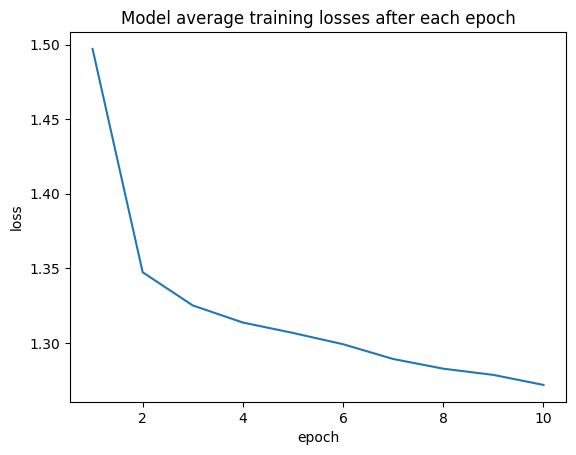

In [ ]:
# visualizing the training loss curve
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
loss_save_path = '/content/drive/MyDrive/cs167_sp24/datasets/rnn_model_' + file_name + '_losses.mat'
res = loadmat(loss_save_path)
train_losses = res['train_losses'][0]
vis = 1
if vis:
    plt.plot(range(1,len(train_losses)+1), train_losses)
    plt.title('Model average training losses after each epoch')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()


In [17]:
# Step 6: Evaluate your model by testing its ability to generate new text that resembles Shakespearean language
# -----------------------------------------------------------------

class SimpleRNNv1(nn.Module):
  def __init__(self, vocab_size, hidden_size, output_size):
    super().__init__()
    # your network layer construction should take place here

    # add an embedding layer which will convert index to a raw character let's say (1 which stands for 'a') or (2 which stands for 'b') or (3 which stands for 'c') to a vector [or length vocab_size] for that character
    self.embedding        = nn.Embedding(vocab_size, vocab_size)
    self.lstm             = nn.LSTM(input_size=vocab_size, hidden_size=hidden_size, num_layers=3)
    self.classifier       = nn.Linear(hidden_size, output_size)

  def forward(self, x_sequence, hidden_state):
    # your code for RNN forward pass should take place here
    embedded_code         = self.embedding(x_sequence)
    output, hidden_state  = self.lstm(embedded_code, hidden_state)
    output                = self.classifier(output)

    return output, (hidden_state[0].detach(), hidden_state[1].detach())


def test_loop(model, seed_data, sequence_length = 1000):

    model.eval()          # set the model to evaluation mode for best practices
    hidden_state          = None
    start_index           = 0
    iteration             = 0

    # provide first few characters to initialize the hidden state
    seed_data_length      = len(seed_data)
    init_output, hidden_state = model(seed_data[0:seed_data_length-1], hidden_state)
    next_input = seed_data[seed_data_length-1]
    next_input = torch.unsqueeze(next_input, dim=0)

    # predict char one letter at a time
    for i in range(sequence_length):
      output, hidden_state = model(next_input, hidden_state)
      output = torch.nn.functional.softmax(torch.squeeze(output), dim=0)
      dist   = torch.distributions.Categorical(output)
      index  = dist.sample().item()
      #print("next character prediction is: ", index_to_vocab_dict[index])
      print(index_to_vocab_dict[index], end="")
      next_input[0] = index


    return None

# load the model
save_path             = '/content/drive/MyDrive/cs167_sp24/datasets/rnn_model_' + file_name + '.pth'
rnn_model             = SimpleRNNv1(vocab_size, 512, vocab_size)
rnn_model.to(device)
#checkpoint = torch.load(save_path, map_location=torch.device('cpu')) # loaded a trained model on 'cpu' directly
checkpoint = torch.load(save_path, map_location=torch.device(device)) # loaded a trained model
rnn_model.load_state_dict( checkpoint )


# provide an initial seed text to the test_loop() method for generating next sequence of characters
seed_text  = "hi ther"
encoding   = np.zeros(len(seed_text))
for i in range(len(seed_text)):
  encoding[i] = vocab_to_index_dict[seed_text[i].lower()]
for i in range(len(encoding)):
  cur_character = index_to_vocab_dict[encoding[i]]
  print("encoding: ", encoding[i], " and the corresponding character is: ", cur_character)
#seed_data           = torch.LongTensor(encoding) # loaded a trained model on 'cpu' directly
seed_data           = torch.LongTensor(encoding).to(device)
seed_data           = torch.unsqueeze(seed_data, dim=1)
test_loop(rnn_model, seed_data, sequence_length = 1000)

encoding:  20.0  and the corresponding character is:  h
encoding:  21.0  and the corresponding character is:  i
encoding:  1.0  and the corresponding character is:   
encoding:  32.0  and the corresponding character is:  t
encoding:  20.0  and the corresponding character is:  h
encoding:  17.0  and the corresponding character is:  e
encoding:  30.0  and the corresponding character is:  r
e ho
kings there.

dorset:
sweet bishop our disvince, you go.

prospero:
intonighs, all the desergs
and roaring money, tailors!
so having on this ann temperes; without o' to
the king's nature of bool enough.

boarina:
i
cannot it unto musice.

sebastian:
you are necpition o' to the gloucns,
or go bonding to the parlo,
drow me well: and, for they and safely me
ang and whose preservones, hound, widows.

boatswatetoe:

sebastian:
i took upon.

dartensio:
his name;
a good sword.

lord.

katharina:
now i sadferce.

antonio:
o, be food resolvens best of your affecious
counded log! he will obse it well hath d

#__Group Exercise__:
Create another RNN with 3 layers of LSTM and then train that model on a text dataset of your choice. If you can't find anything interesting you can download the following dataset and then train your RNN model on that.
- [Download this text file -- _baby names.txt_](https://analytics.drake.edu/~reza/teaching/cs167_sp24/dataset/baby_names.txt)
- Then, put it in your Google Drive.
- You can also find it on Blackboard.
  - [Reference](http://www.cs.cmu.edu/afs/cs/project/ai-repository/ai/areas/nlp/corpora/names/)

In [18]:
# Step 1: load the Torch library and other utilities
#----------------------------------------------------



Using cuda device


In [ ]:
# Step 2: load the dataset, ie, pick the dataset of your choice (baby_names or some thing else that you find interesting)
#--------------------------------------------------------------------------------------------------
file_name = 'baby_names'
path = '/content/drive/MyDrive/cs167_sp24/datasets/' + file_name + '.txt' # you can download the text file from Blackboard --> datasets
with open(path, 'r') as file:
  text_data = file.read() # read the entire text as a big string

text_vocab = sorted(set(text_data.lower()))
vocab_size = len(text_vocab)
print("Vocabulary (referring to the alphabets present in your text data): ", text_vocab) # 'Vocabulary' refers to the alphabets present in your text data.
print("")
print("Vocabulary size (referring to the alphabets present in your text data): ", vocab_size) # 'Vocabulary' refers to the alphabets present in your text data.
print("")
text_data_size = len(text_data)
print("Total number of letters (or characters) in the dataset: ", text_data_size)
print("")

# First: create a mapping between the characters in our voculary to a set of numeric indices
def convert_vocab_to_index(vocab):
  vocab_to_index_dict = {}
  for index, char in enumerate(vocab):
    vocab_to_index_dict[char] = index
  return vocab_to_index_dict

def convert_index_to_vocab(vocab):
  index_to_vocab_dict = {}
  for index, char in enumerate(vocab):
    index_to_vocab_dict[index] = char
  return index_to_vocab_dict


vocab_to_index_dict = convert_vocab_to_index(text_vocab)
index_to_vocab_dict = convert_index_to_vocab(text_vocab)


# Second: convert the text_data to numeric numbers using the above conversion method (this mapped data will be used for training)
text_data_numeric_values = np.zeros(text_data_size)
for i in range(text_data_size):
  cur_character = text_data[i].lower()
  text_data_numeric_values[i] = vocab_to_index_dict[cur_character]

# Third: convert to tensor datatype

train_data = torch.LongTensor(text_data_numeric_values).to(device)
train_data = torch.unsqueeze(train_data, dim=1) # make each number a separate sample for training by putting them in a separate inner list



In [ ]:
# Step 3: Create your RNN Network (call it SimpleRNNv1) with 1 embedding layer + 3 layers of LSTM module
#--------------------------------------------------------------------------------------------------




In [21]:
# Step 4: Your training and testing functions
#--------------------------------------------------------------------------------------



In [ ]:
# Step 5: select your optimizer and set the hyper-parameters for learning the model
#------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# visualizing the training loss curve


In [25]:
# Step 6: Evaluate your model by testing its ability to generate new baby names that resembles the ones it learned from 'baby_names.txt' file
# -------------------------------------------------------------------------------------------------------------------------------------------


encoding:  11.0  and the corresponding character is:  h
encoding:  12.0  and the corresponding character is:  i
encoding:  1.0  and the corresponding character is:   
encoding:  23.0  and the corresponding character is:  t
encoding:  11.0  and the corresponding character is:  h
encoding:  8.0  and the corresponding character is:  e
encoding:  21.0  and the corresponding character is:  r

thever
wivlaith
wilduth
wilton
wit
wolch
tonell
wonette
woney
wovit
wobgiel
wogny
woblaw
wolfie
wol
wothan
wodnaz
wow
woybeur
woidaw
woeland
woachew
wawby
waibur
wat
waz
ways
tain
wadey
waighwin
wuade
wuiber
wuedey
vyfaid
wianchfrinchwud
widcher
wiwger
witthwoy
wickie
witwy
wynah
wistold
wwuno
wuine
rwilley
wwiotunne
wlence
wwonky
vhaday
wwode
wir
wirlen
wiwn
winy
winwy
wincmul
wenthew
winchaw
windrick
whonny
wwinnard
windhew
wilthin
wildon
thole
theb
webliv
bilton
wilyo
wilon
wiris
zhero
nebbert
wokfouut
waodor
wald
waldon
was
walfh
wawce
blayke
twos
thiodaw
wlefton
wilett
winill
wir
wirpie
wirvine
wi